## STA302 Final Project ##

In [47]:
library(UsingR)
library(scatterplot3d)
library(xtable)
library(car)
library(Matrix)
library(MPV)



In [48]:
rm(list = ls())
# setwd("~/Dropbox/UofT Admin and TA/STA 302/Lectures/Final Project")


library(NHANES)
library(tidyverse)
library(glmnet)
library(rms)

small.nhanes <- na.omit(NHANES[NHANES$SurveyYr=="2011_12"
                               & NHANES$Age > 17,c(1,3,4,8:11,13,17,20,21,25,46,50,51,52,61)])
small.nhanes <- as.data.frame(small.nhanes %>%
  group_by(ID) %>% filter(row_number()==1) )
# nrow(small.nhanes)

## Checking whether there are any ID that was repeated. If not ##
## then length(unique(small.nhanes$ID)) and nrow(small.nhanes) are same ##
# length(unique(small.nhanes$ID))

## Create training and test set ##
set.seed(1003998757)
train <- small.nhanes[sample(seq_len(nrow(small.nhanes)), size = 400),]
# nrow(train)
length(which(small.nhanes$ID %in% train$ID))
test <- small.nhanes[!small.nhanes$ID %in% train$ID,]
# nrow(test)

[1] 400

not limited to):
• Model Diagnostics
• Checking for the variance inflation factor (VIF)
• Variable selection ---> model selection
• Shrinkage methods ---> LASSO 
• Model Validation


• Checking the prediction error on the test set after applying various model selection techniques
• After selecting the best model interpret and explain the parameter estimates
• Conclude on the effect of predictors on the combined systolic blood pressure readin

In [49]:
## Running the model ##
### First fit a multiple linear regression ##
model.lm <- lm( BPSysAve ~ ., data = train[, -c(1)])
summary(model.lm)


Call:
lm(formula = BPSysAve ~ ., data = train[, -c(1)])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.653 -10.108  -1.269   9.552  69.049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               195.31152   67.12715   2.910  0.00384 ** 
Gendermale                  4.06058    2.43465   1.668  0.09621 .  
Age                         0.53846    0.06484   8.304 2.03e-15 ***
Race3Black                  7.48535    5.73519   1.305  0.19267    
Race3Hispanic               4.06378    6.16467   0.659  0.51018    
Race3Mexican                3.55583    5.89748   0.603  0.54693    
Race3White                  0.97877    5.25457   0.186  0.85234    
Race3Other                 -3.18834    6.83469  -0.466  0.64114    
Education9 - 11th Grade     1.50893    3.77297   0.400  0.68944    
EducationHigh School       -2.51853    3.52145  -0.715  0.47495    
EducationSome College      -1.05749    3.58732  -0.295  0.76833    
EducationCollege G

## Model Diagnostics ##

In [50]:
## Model Diagnostics ##

## VIF ##

## Variable Selection (Model Selection) ##

In [51]:
## Model selection criteria ##
criteria <- function(model){
    n <- length(model$residuals)
    p <- length(model$coefficients) - 1
    RSS <- sum(model$residuals^2)
    R2 <- summary(model)$r.squared
    R2.adj <- summary(model)$adj.r.squared
    AIC <- n*log(RSS/n) + 2*p
    AICc <- AIC + (2*(p+2)*(p+3))/(n-p-1)
    BIC <- n*log(RSS/n) + (p+2)*log(n)
    res <- c(R2, R2.adj, AIC, AICc, BIC)
    names(res) <- c("R Squared", "Adjsuted R Squared", "AIC", "AICc", "BIC")
    return(res)
}

In [52]:

## The crteria ##
## model 1 ##
model.1 <- lm(I(sqrt(Defective)) ~ Temperature + Density + Rate, data = def)
crit1 <- criteria(model = model.1)

## model 2 ##
model.2 <- lm(I(sqrt(Defective)) ~ Temperature , data = def)
crit2 <- criteria(model = model.2)

## model 3 ##
model.3 <- lm(I(sqrt(Defective)) ~ Rate , data = def)
crit3 <- criteria(model = model.3)

## model 4 ##
model.4 <- lm(I(sqrt(Defective)) ~ Density , data = def)
crit4 <- criteria(model = model.4)

## model 5 ##
model.5 <- lm(I(sqrt(Defective)) ~ Temperature + Density , data = def)
crit5 <- criteria(model = model.5)

## model 6 ##
model.6 <- lm(I(sqrt(Defective)) ~ Temperature + Rate , data = def)
crit6 <- criteria(model = model.6)

## model 7 ##
model.7 <- lm(I(sqrt(Defective)) ~ Density + Rate , data = def)
crit7 <- criteria(model = model.7)

## model 8 ##
model.8 <- lm(I(sqrt(Defective)) ~ 1 , data = def)
crit8 <- criteria(model = model.8)


ERROR: Error in is.data.frame(data): objet 'def' introuvable


## Srinkage Methods ##

In [57]:
# ## Perform Prediction ##
pred.y <- predict(model.lm, newdata = test, type = "response")

# ## Prediction error ##
mean((test$BPSysAve - pred.y)^2)

## Fit a ridge penalty ##
model.ridge <- glmnet(x = model.matrix( ~ ., data = train[,-c(1,12)]), y = train$BPSysAve, 
                      standardize = T, alpha = 0)

# ## Perform Prediction ##
pred.y.ridge <- predict(model.ridge, newx = model.matrix( ~ ., data = test[,-c(1,12)]), type = "response")

# ## Prediction error ##
mean((test$BPSysAve - pred.y.ridge)^2)


# ## Fit a LASSO penalty ## --> shrinkage method 
model.lasso <- glmnet(x = model.matrix( ~ ., data = train[,-c(1,12)]), y = train$BPSysAve
                      , standardize = T, alpha = 1)

# ## Perform Prediction ##
pred.y.lasso <- predict(model.lasso, newx = model.matrix( ~ ., data = test[,-c(1,12)]), type = "response")
# ## Prediction error ##
mean((test$BPSysAve - pred.y.lasso)^2)


[1] 252.7126

[1] 276.8457

[1] 252.1785

In [70]:
## Elastic net ##

model.EN <- glmnet(x = data.matrix(train[,2:9]), y = train$BPSysAve, standardize = T, alpha = 0.5)

# ## Perform Prediction ##
pred.y.EN <- predict(model.EN, newx = data.matrix(test[,2:9]), type = "response")

## Model Validation ##

[1] 4.208965

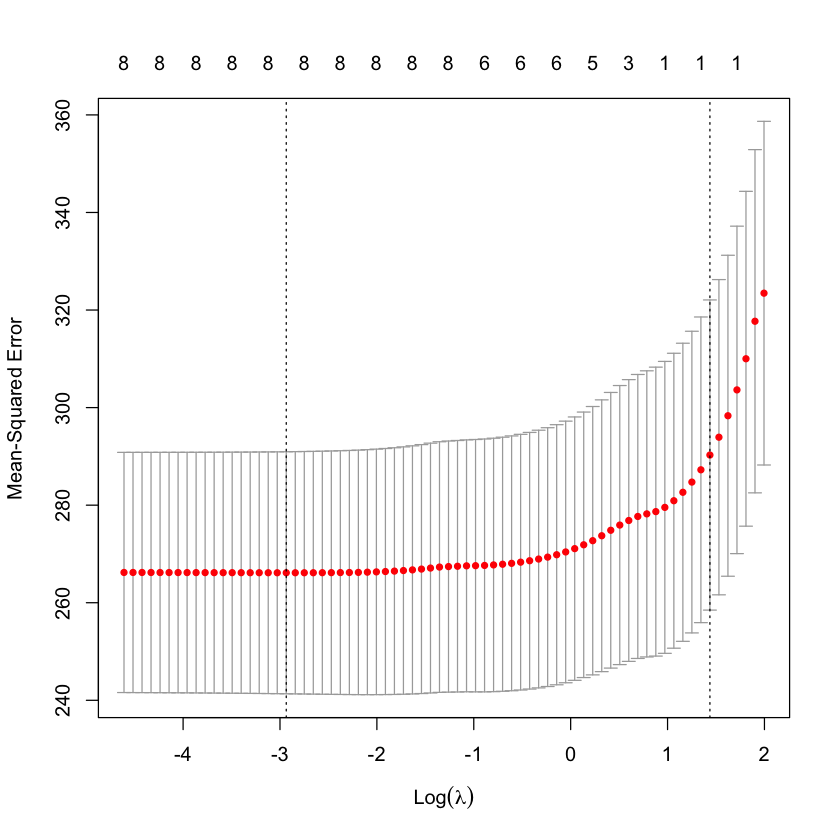

In [71]:
## Perform cross validation to choose lambda ##
# set.seed(1002656486)
cv.out <- cv.glmnet(x = data.matrix(train[,2:9]), y = train$BPSysAve, standardize = T, alpha = 1)
plot(cv.out)
best.lambda <- cv.out$lambda.1se
best.lambda
co<-coef(cv.out, s = "lambda.1se")

In [72]:
## threfvshold for variable selection ##

thresh <- 0.00
# select variables #
inds<-which(abs(co) > thresh )
variables<-row.names(co)[inds]
sel.var.lasso<-variables[!(variables %in% '(Intercept)')]
sel.var.lasso


[1] "Age"

In [77]:
## Step wise regression ###

### First fit a multiple linear regression ##
## Based on AIC ##
# model.lm <- lm(lpsa ~ ., data = train[, -c(1)])
summary(model.lm)  
n <- nrow(train)
sel.var.aic <- step(model.lm, trace = 0, k = 2, direction = "both") 
sel.var.aic<-attr(terms(sel.var.aic), "term.labels")   
sel.var.aic






Call:
lm(formula = BPSysAve ~ ., data = train[, -c(1)])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.653 -10.108  -1.269   9.552  69.049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               195.31152   67.12715   2.910  0.00384 ** 
Gendermale                  4.06058    2.43465   1.668  0.09621 .  
Age                         0.53846    0.06484   8.304 2.03e-15 ***
Race3Black                  7.48535    5.73519   1.305  0.19267    
Race3Hispanic               4.06378    6.16467   0.659  0.51018    
Race3Mexican                3.55583    5.89748   0.603  0.54693    
Race3White                  0.97877    5.25457   0.186  0.85234    
Race3Other                 -3.18834    6.83469  -0.466  0.64114    
Education9 - 11th Grade     1.50893    3.77297   0.400  0.68944    
EducationHigh School       -2.51853    3.52145  -0.715  0.47495    
EducationSome College      -1.05749    3.58732  -0.295  0.76833    
EducationCollege G

[1] "Gender"  "Age"     "Poverty" "Height"

In [80]:

## Based on BIC ##
# model.lm <- lm(lpsa ~ ., data = train[, -c(1)])
summary(model.lm)  
n <- nrow(train)
sel.var.bic <- step(model.lm, trace = 0, k = log(n), direction = "both") 
sel.var.bic<-attr(terms(sel.var.bic), "term.labels")   
sel.var.bic


### Cross Validation and prediction performance of AIC based selection ###
ols.aic <- ols(BPSysAve ~ ., data = train[,which(colnames(train) %in% c(sel.var.aic, "BPSysAve"))], 
               x=T, y=T, model = T)

## 10 fold cross validation ##    
aic.cross <- calibrate(ols.aic, method = "crossvalidation", B = 10)
## Calibration plot ##
pdf("aic_cross.pdf", height = 8, width = 16)
plot(aic.cross, las = 1, xlab = "Predicted Probability", main = "Cross-Validation calibration with AIC")
dev.off()

## Test Error ##
pred.aic <- predict(ols.aic, newdata = test[,which(colnames(train) %in% c(sel.var.aic, "BPSysAve"))])
## Prediction error ##
pred.error.AIC <- mean((test$BPSysAve - pred.aic)^2)


Call:
lm(formula = BPSysAve ~ ., data = train[, -c(1)])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.653 -10.108  -1.269   9.552  69.049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               195.31152   67.12715   2.910  0.00384 ** 
Gendermale                  4.06058    2.43465   1.668  0.09621 .  
Age                         0.53846    0.06484   8.304 2.03e-15 ***
Race3Black                  7.48535    5.73519   1.305  0.19267    
Race3Hispanic               4.06378    6.16467   0.659  0.51018    
Race3Mexican                3.55583    5.89748   0.603  0.54693    
Race3White                  0.97877    5.25457   0.186  0.85234    
Race3Other                 -3.18834    6.83469  -0.466  0.64114    
Education9 - 11th Grade     1.50893    3.77297   0.400  0.68944    
EducationHigh School       -2.51853    3.52145  -0.715  0.47495    
EducationSome College      -1.05749    3.58732  -0.295  0.76833    
EducationCollege G

[1] "Age"


n=400   Mean absolute error=0.612   Mean squared error=0.53077
0.9 Quantile of absolute error=0.997



pdf 
  2

In [75]:

### Cross Validation and prediction performance of BIC based selection ###
ols.bic <- ols(BPSysAve ~ ., data = train[,which(colnames(train) %in% c(sel.var.bic, "BPSysAve"))], 
               x=T, y=T, model = T)

## 10 fold cross validation ##    
bic.cross <- calibrate(ols.bic, method = "crossvalidation", B = 10)
## Calibration plot ##
pdf("bic_cross.pdf", height = 8, width = 16)
plot(bic.cross, las = 1, xlab = "Predicted Probability", main = "Cross-Validation calibration with BIC")
dev.off()

## Test Error ##
pred.bic <- predict(ols.bic, newdata = test[,which(colnames(train) %in% c(sel.var.bic, "BPSysAve"))])
## Prediction error ##
pred.error.BIC <- mean((test$BPSysAve - pred.bic)^2)

### Cross Validation and prediction performance of lasso based selection ###
ols.lasso <- ols(BPSysAve ~ ., data = train[,which(colnames(train) %in% c(sel.var.lasso, "BPSysAve"))], 
                 x=T, y=T, model = T)

## 10 fold cross validation ##    
lasso.cross <- calibrate(ols.lasso, method = "crossvalidation", B = 10)
## Calibration plot ##
pdf("lasso_cross.pdf", height = 8, width = 16)
plot(lasso.cross, las = 1, xlab = "Predicted Probability", main = "Cross-Validation calibration with LASSO")
dev.off()

## Test Error ##
pred.lasso <- predict(ols.lasso, newdata = test[,which(colnames(train) %in% c(sel.var.lasso, "BPSysAve"))])
## Prediction error ##
pred.error.lasso <- mean((test$BPSysAve - pred.lasso)^2)

print(c(pred.error.AIC, pred.error.BIC, pred.error.lasso))



n=400   Mean absolute error=1.428   Mean squared error=3.94738
0.9 Quantile of absolute error=2.034



pdf 
  2


n=400   Mean absolute error=1.297   Mean squared error=2.9988
0.9 Quantile of absolute error=2.22



pdf 
  2

[1] 240.0521 245.8945 245.8945
